In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv('chocolate.csv')
df.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


Postoji li razlika u ocjenama ovisno o DRŽAVI PODRIJETLA KAKAA?

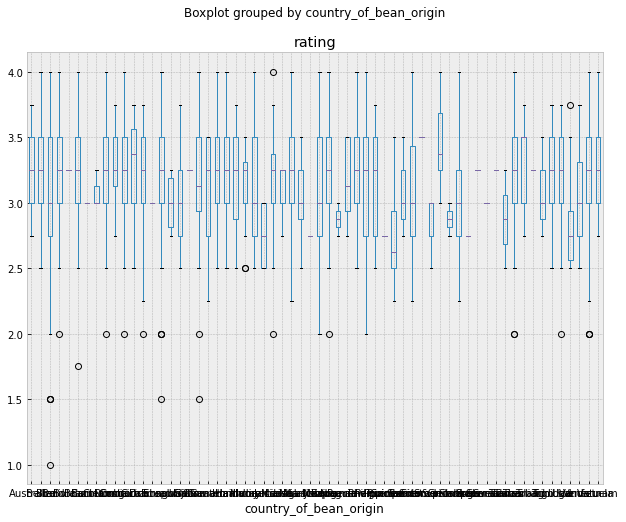

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='country_of_bean_origin', ax=ax)
plt.show()

In [6]:
model = ols('rating ~ country_of_bean_origin', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                            df      sum_sq   mean_sq         F    PR(>F)
country_of_bean_origin    61.0   12.986766  0.212898  1.132693  0.226831
Residual                2162.0  406.363630  0.187957       NaN       NaN


p-vrijednost veća od 0.05 => nema statistički značajne razlike

Postoji li razlika u ocjenama ovisno o TVRTCI?

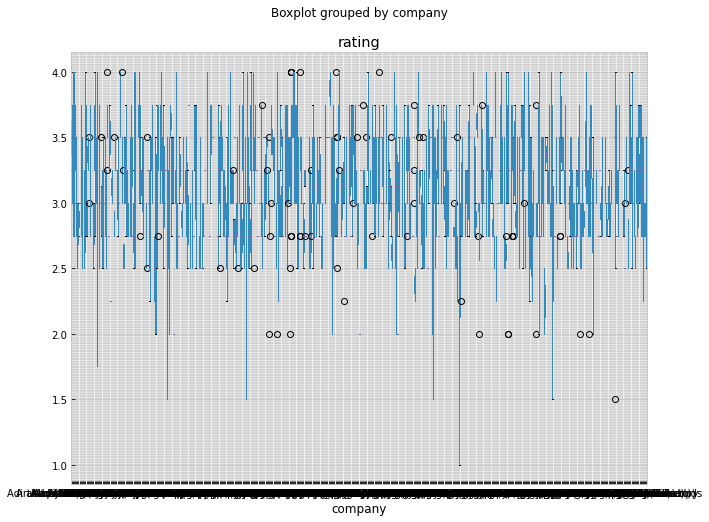

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='company', ax=ax)
plt.show()

In [8]:
model = ols('rating ~ company', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

              df      sum_sq  mean_sq         F        PR(>F)
company    501.0  177.409160  0.35411  2.520354  5.470834e-44
Residual  1722.0  241.941236  0.14050       NaN           NaN


p-vrijednost manja od 0.05 => ima statistički značajne razlike

ima ih jako puno, probaj eliminirat neke i jos pogledat kak bude onda

Postoji li razlika u ocjenama ovisno o LOKACIJI TVRTKE?

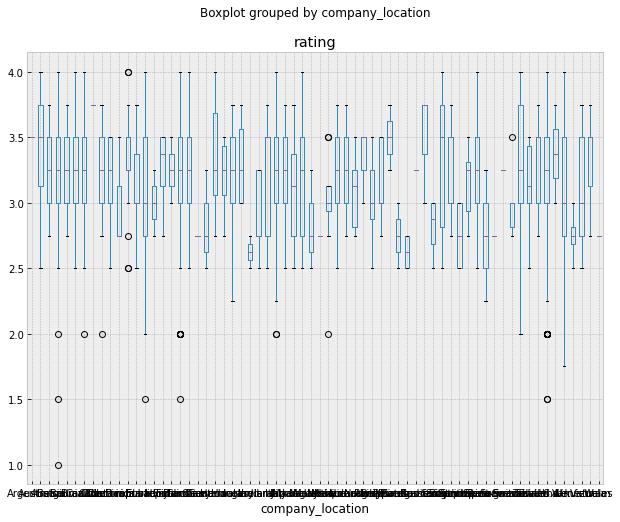

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='company_location', ax=ax)
plt.show()

In [10]:
model = ols('rating ~ company_location', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                      df      sum_sq   mean_sq         F    PR(>F)
company_location    65.0   20.709348  0.318605  1.724735  0.000341
Residual          2158.0  398.641048  0.184727       NaN       NaN


mala p-vrijednost => statistički značajna razlika

Postoji li razlika u ocjenama ovisno o GODINI OCJENE?

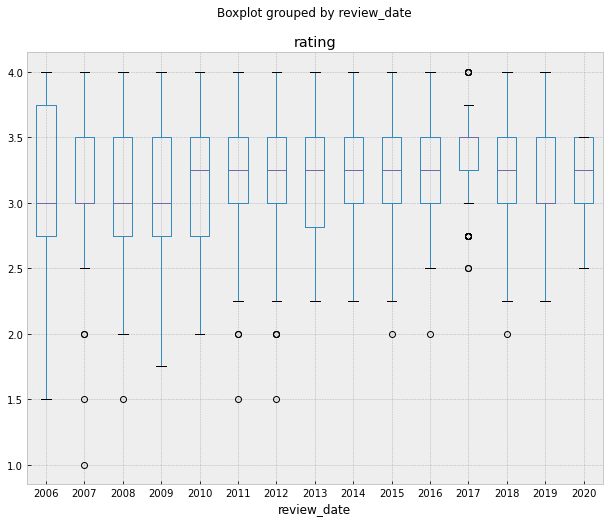

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='review_date', ax=ax)
plt.show()

In [43]:
model = ols('rating ~ review_date', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                 df      sum_sq   mean_sq         F    PR(>F)
review_date     1.0    1.254192  1.254192  6.665487  0.009893
Residual     2222.0  418.096204  0.188162       NaN       NaN


mala p-vrijednost => stat. značajna razlika

Postoji li razlika u ocjenama ovisno o BROJU SASTOJAKA?

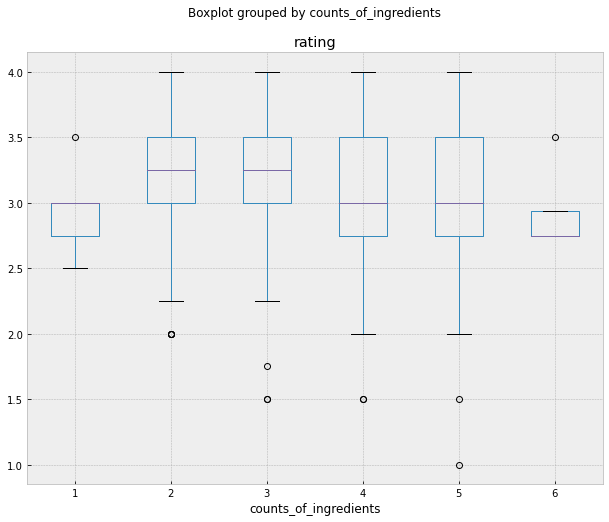

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='counts_of_ingredients', ax=ax)
plt.show()

In [16]:
model = ols('rating ~ counts_of_ingredients', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                           df      sum_sq   mean_sq          F    PR(>F)
counts_of_ingredients     1.0    3.772680  3.772680  20.171666  0.000007
Residual               2222.0  415.577716  0.187029        NaN       NaN


postoji razlika

Postoji li razlika u ocjenama ovisno o KAKAOVOM MASLACU?

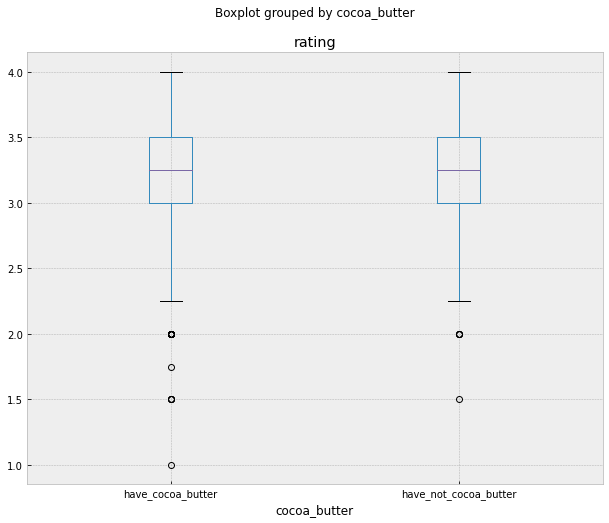

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='cocoa_butter', ax=ax)
plt.show()

In [11]:
model = ols('rating ~ cocoa_butter', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                  df      sum_sq   mean_sq         F    PR(>F)
cocoa_butter     1.0    0.062658  0.062658  0.332053  0.564511
Residual      2222.0  419.287738  0.188698       NaN       NaN


ne postoji razlika

Postoji li razlika u ocjenama ovisno o VANILIJI?

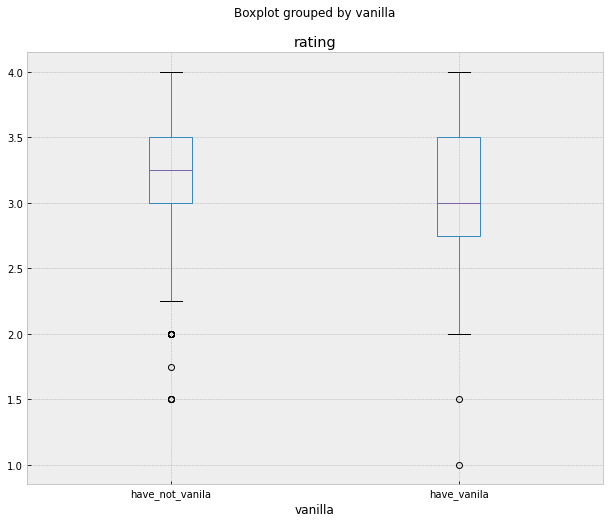

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='vanilla', ax=ax)
plt.show()

In [21]:
model = ols('rating ~ vanilla', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

              df      sum_sq    mean_sq          F        PR(>F)
vanilla      1.0   11.400362  11.400362  62.094868  5.079941e-15
Residual  2222.0  407.950034   0.183596        NaN           NaN


postoji razlika

Postoji li razlika u ocjenama ovisno o LECITINU?

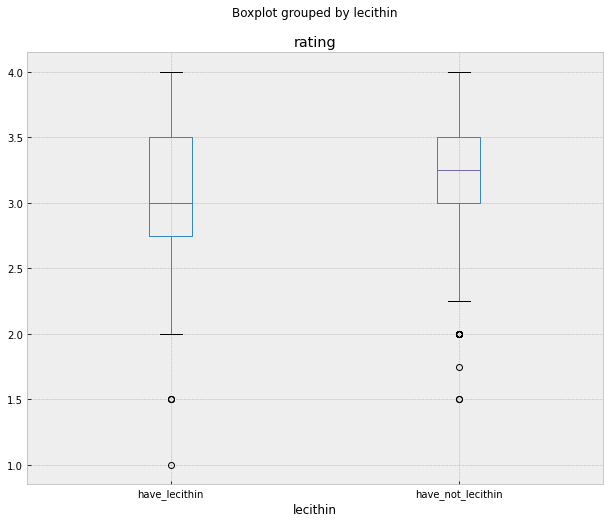

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='lecithin', ax=ax)
plt.show()

In [23]:
model = ols('rating ~ lecithin', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

              df      sum_sq   mean_sq          F    PR(>F)
lecithin     1.0    2.065336  2.065336  10.997702  0.000927
Residual  2222.0  417.285060  0.187797        NaN       NaN


postoji razlika

Postoji li razlika u ocjenama ovisno o SOLI?

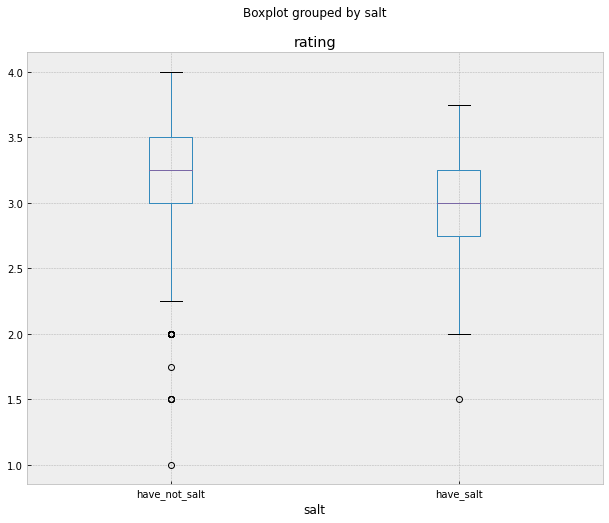

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='salt', ax=ax)
plt.show()

In [25]:
model = ols('rating ~ salt', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

              df      sum_sq   mean_sq         F    PR(>F)
salt         1.0    1.107105  1.107105  5.881713  0.015378
Residual  2222.0  418.243291  0.188228       NaN       NaN


postoji razlika

Postoji li razlika u ocjenama ovisno o ŠEĆERU?

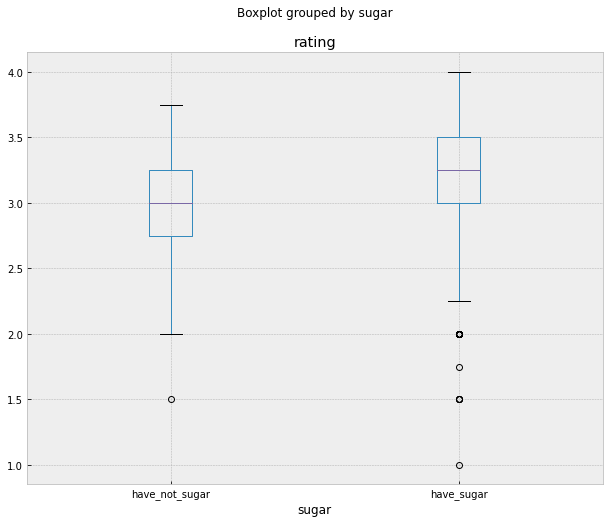

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='sugar', ax=ax)
plt.show()

In [27]:
model = ols('rating ~ sugar', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

              df      sum_sq   mean_sq          F    PR(>F)
sugar        1.0    3.566068  3.566068  19.057485  0.000013
Residual  2222.0  415.784328  0.187122        NaN       NaN


postoji razlika

Postoji li razlika u ocjenama ovisno o SLADILU?

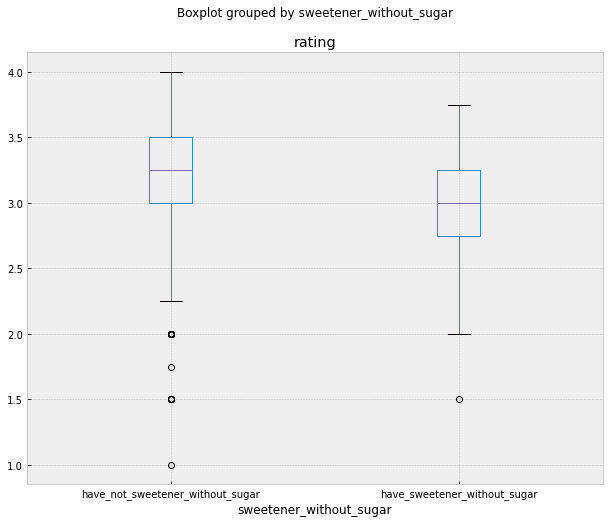

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='sweetener_without_sugar', ax=ax)
plt.show()

In [30]:
model = ols('rating ~ sweetener_without_sugar', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                             df      sum_sq   mean_sq          F    PR(>F)
sweetener_without_sugar     1.0    3.206080  3.206080  17.118842  0.000036
Residual                 2222.0  416.144316  0.187284        NaN       NaN


postoji razlika

KOMBINACIJE SASTOJAKA => postoji li razlika?

In [50]:
model = ols('rating ~ cocoa_butter*vanilla*lecithin*salt*sugar', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                                              df      sum_sq    mean_sq  \
cocoa_butter                                 1.0    0.062658   0.062658   
vanilla                                      1.0   12.694895  12.694895   
lecithin                                     1.0    0.271279   0.271279   
salt                                         1.0    1.073097   1.073097   
sugar                                        1.0    2.674140   2.674140   
cocoa_butter:vanilla                         1.0    0.116805   0.116805   
cocoa_butter:lecithin                        1.0    1.655221   1.655221   
vanilla:lecithin                             1.0    2.327117   2.327117   
cocoa_butter:salt                            1.0    0.208116   0.208116   
vanilla:salt                                 1.0    0.213615   0.213615   
lecithin:salt                                1.0    0.004596   0.004596   
cocoa_butter:sugar                           1.0    0.028324   0.028324   
vanilla:sugar            

Postoji li razlika u ocjenama ovisno o PRVOM OKUSU?

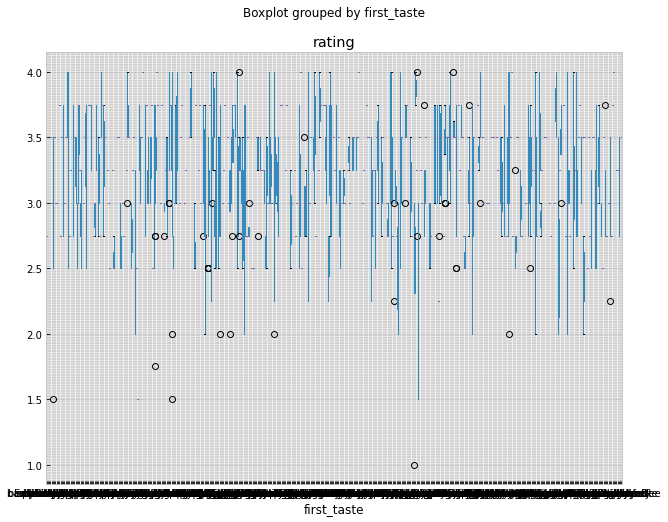

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='first_taste', ax=ax)
plt.show()

In [35]:
model = ols('rating ~ first_taste', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                 df      sum_sq   mean_sq         F        PR(>F)
first_taste   455.0  172.527379  0.379181  2.716084  5.984279e-49
Residual     1768.0  246.823017  0.139606       NaN           NaN


Postoji li razlika u ocjenama ovisno o DRUGOM OKUSU?

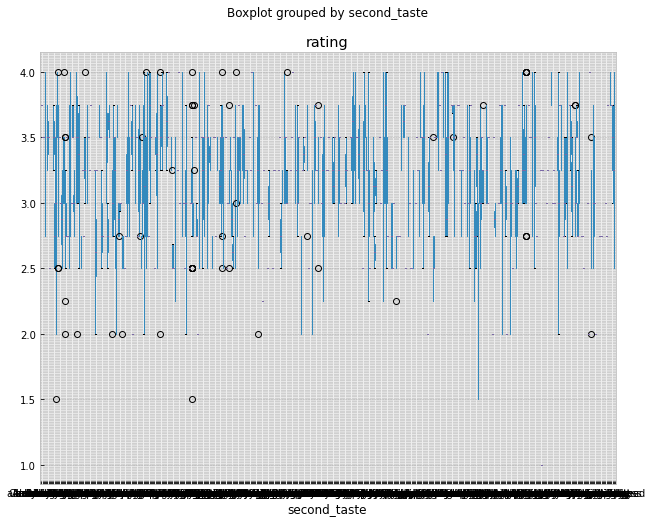

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='second_taste', ax=ax)
plt.show()

In [37]:
model = ols('rating ~ second_taste', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                  df      sum_sq   mean_sq         F        PR(>F)
second_taste   478.0  178.559204  0.373555  2.771756  1.481065e-51
Residual      1668.0  224.799522  0.134772       NaN           NaN


Postoji li razlika u ocjenama ovisno o TREĆEM OKUSU?

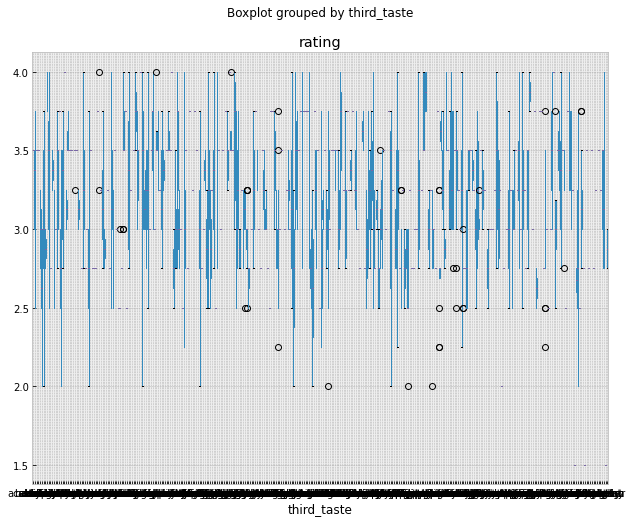

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='third_taste', ax=ax)
plt.show()

In [39]:
model = ols('rating ~ third_taste', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                 df      sum_sq   mean_sq         F        PR(>F)
third_taste   331.0  126.493445  0.382155  2.791401  4.456450e-38
Residual     1272.0  174.142570  0.136905       NaN           NaN


Postoji li razlika u ocjenama ovisno o ČETVRTOM OKUSU?

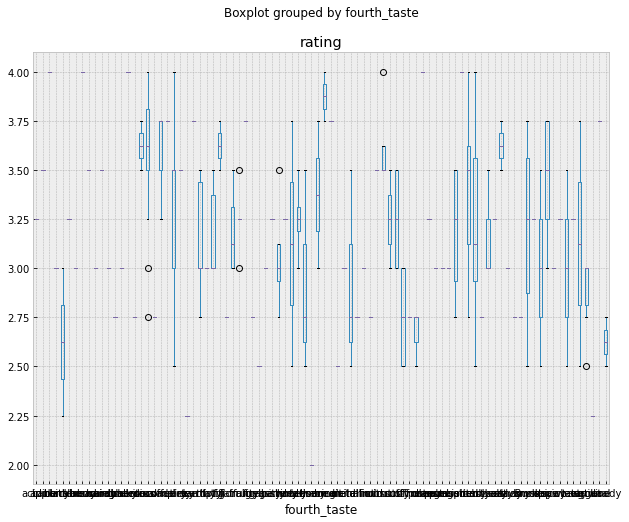

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['rating'], by='fourth_taste', ax=ax)
plt.show()

In [41]:
model = ols('rating ~ fourth_taste', data=df).fit()
anova_result = sm.stats.anova_lm(model, type=2)
print(anova_result)

                 df     sum_sq   mean_sq         F        PR(>F)
fourth_taste   87.0  26.313348  0.302452  2.423041  8.171429e-07
Residual      154.0  19.222809  0.124823       NaN           NaN
